In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# ===============================
# IMDB Dataset: Data Exploration & Preprocessing
# ===============================
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the IMDB dataset from Google Drive
imdb_path = "/content/drive/MyDrive/Project2/raw data/IMDB-Dataset.csv"
imdb_df = pd.read_csv(imdb_path, low_memory=False)

# Print basic dataset information
print("IMDB Dataset Shape:", imdb_df.shape)
print("IMDB Dataset Columns:", imdb_df.columns.tolist())
print("First 3 Rows:")
print(imdb_df.head(3))

IMDB Dataset Shape: (50000, 2)
IMDB Dataset Columns: ['review', 'sentiment']
First 3 Rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive


In [3]:
# -------------------------------
# Define a cleaning function for text
def clean_text(text):
    """
    Removes HTML tags, converts text to lowercase, and normalizes whitespace.
    """
    # Ensure text is a string
    if not isinstance(text, str):
        text = str(text)
    # Remove HTML tags (e.g., <br />)
    text = re.sub(r'<.*?>', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text




In [4]:
# -------------------------------
# Preprocess the dataset

# Clean the 'review' column and create a new column for cleaned reviews
imdb_df["clean_review"] = imdb_df["review"].fillna('').apply(clean_text)

# Display original and cleaned text for comparison
print("\nSample of Original vs. Cleaned Reviews:")
print(imdb_df[["review", "clean_review"]].head(3))

# -------------------------------



Sample of Original vs. Cleaned Reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   

                                        clean_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. the filming tec...  
2  i thought this was a wonderful way to spend ti...  



Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Plot saved to /content/drive/MyDrive/Project2/EDA plots/imdb_sentiment_distribution.png


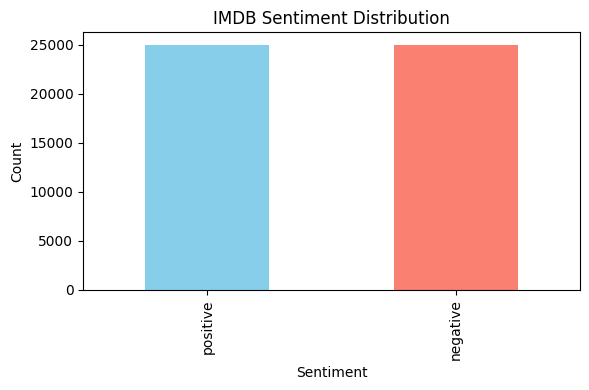

In [5]:
# Data Exploration: Sentiment Distribution

# Check the distribution of sentiments
sentiment_counts = imdb_df["sentiment"].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

# Visualize the sentiment distribution using a bar plot
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=['skyblue', 'salmon'])
plt.title("IMDB Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

# Save the plot to the specified folder in Google Drive
plot_path = "/content/drive/MyDrive/Project2/EDA plots/imdb_sentiment_distribution.png"
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()



In [7]:
# -------------------------------
# Optionally, sample and save the cleaned dataset for later use
# Here we randomly select 50% of the rows from the cleaned IMDB dataset
sampled_imdb_df = imdb_df.sample(frac=0.5, random_state=42)

# Save the sampled dataset
cleaned_imdb_path = "/content/drive/MyDrive/Project2/clean_data/IMDB-Dataset_cleaned.csv"
sampled_imdb_df.to_csv(cleaned_imdb_path + ".gz", index=False, compression="gzip")
print("\nCleaned and sampled IMDB dataset saved with gzip compression to:", cleaned_imdb_path + ".gz")




Cleaned and sampled IMDB dataset saved with gzip compression to: /content/drive/MyDrive/Project2/clean_data/IMDB-Dataset_cleaned.csv.gz
